In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

import datetime

from wordcloud import WordCloud
from wordcloud import STOPWORDS

import math
import numpy as np

In [2]:
data = sqlite3.connect('/Users/cp/Documents/dsi/8a_kaggle/database.sqlite')
ascents_df = pd.read_sql_query("SELECT * FROM ascent where climb_type = 1", data)
ascents_df['date'] = pd.to_datetime(ascents_df['date'], unit = 's')
ascents_df['date'] = ascents_df.date.dt.round('1d')

In [3]:
ascents_df['name'] = ascents_df['name'].str.lower()

In [4]:
# ascents_df = ascents_df[ascents_df['name']!='?']
ascents_df['name'].head()

0           glycerin
1     nitroglycerine
2              babar
3    bengt johansson
4         mr olympia
Name: name, dtype: object

In [5]:
ascents_df.shape

(1236202, 28)

In [6]:
ascents_df = ascents_df[ascents_df.name !='?']

In [7]:
ascents_df.name.head()

0           glycerin
1     nitroglycerine
2              babar
3    bengt johansson
4         mr olympia
Name: name, dtype: object

In [8]:

ascents_df = ascents_df[ascents_df['name']!='?']
ascents_df = ascents_df[ascents_df['name']!='???']
ascents_df = ascents_df[ascents_df['name']!='??']
ascents_df = ascents_df[ascents_df['name']!='unknown']
ascents_df = ascents_df[ascents_df['name']!='unnamed']
ascents_df = ascents_df[ascents_df['name']!='no name']
ascents_df = ascents_df[ascents_df['name']!='...']
ascents_df = ascents_df[ascents_df['name']!='Unknown']
ascents_df = ascents_df[ascents_df['name']!='-']
ascents_df = ascents_df[ascents_df['name']!='¿?']
ascents_df = ascents_df[ascents_df['name']!='name']
ascents_df = ascents_df[ascents_df['name']!='Name']
ascents_df = ascents_df[ascents_df['name']!="don't know name"]
ascents_df = ascents_df[ascents_df['name']!='????']

In [9]:
ascents_df.name.head()

0           glycerin
1     nitroglycerine
2              babar
3    bengt johansson
4         mr olympia
Name: name, dtype: object

In [10]:
ascents_df.describe()

,id,user_id,grade_id,raw_notes,method_id,climb_type,total_score,year,last_year,rec_date,project_ascent_date,crag_id,sector_id,rating,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
count,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1191281.0,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06,1.191281e+06
mean,2.392485e+06,2.513114e+04,4.720442e+01,2.065630e+00,1.405549e+00,1.0,6.602173e+02,2.010997e+03,8.220647e-02,1.323630e+09,9.368422e+05,2.266895e+04,1.188044e+03,1.292523e+00,1.407512e+02,2.355448e-03,1.079174e-02,5.415179e-03,6.757684e-02,7.143571e-04
std,1.417528e+06,1.756069e+04,8.957774e+00,5.358731e+00,1.012713e+00,0.0,2.259617e+02,1.195304e+01,2.746791e-01,1.165364e+08,3.724051e+07,7.883804e+03,2.311654e+03,1.259840e+00,1.266930e+02,4.847578e-02,1.033213e-01,7.338842e-02,2.510184e-01,2.671792e-02
min,1.560000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.0,-3.000000e+00,0.000000e+00,0.000000e+00,1.107126e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.159573e+06,1.024800e+04,4.200000e+01,0.000000e+00,1.000000e+00,1.0,5.450000e+02,2.008000e+03,0.000000e+00,1.239530e+09,0.000000e+00,2.263300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.342606e+06,2.231300e+04,4.900000e+01,0.000000e+00,1.000000e+00,1.0,7.000000e+02,2.012000e+03,0.000000e+00,1.334174e+09,0.000000e+00,2.265600e+04,0.000000e+00,1.000000e+00,2.550000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.630381e+06,3.749500e+04,5.300000e+01,0.000000e+00,1.000000e+00,1.0,8.000000e+02,2.014000e+03,0.000000e+00,1.422552e+09,0.000000e+00,2.781200e+04,1.035000e+03,3.000000e+00,2.550000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.910381e+06,6.702200e+04,8.300000e+01,5.100000e+01,5.000000e+00,1.0,1.350000e+03,2.017000e+03,1.000000e+00,1.505205e+09,1.505081e+09,3.604300e+04,1.329000e+04,3.000000e+00,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
ascents_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191281 entries, 0 to 1236201
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1191281 non-null  int64         
 1   user_id               1191281 non-null  int64         
 2   grade_id              1191281 non-null  int64         
 3   notes                 1191281 non-null  object        
 4   raw_notes             1191281 non-null  int64         
 5   method_id             1191281 non-null  int64         
 6   climb_type            1191281 non-null  int64         
 7   total_score           1191281 non-null  int64         
 8   date                  1191281 non-null  datetime64[ns]
 9   year                  1191281 non-null  int64         
 10  last_year             1191281 non-null  int64         
 11  rec_date              1191281 non-null  int64         
 12  project_ascent_date   1191281 non-null  in

In [16]:
ascents_df.name.value_counts()

cortomaltèse                         1017
the hulk                             1008
la marie-rose                         989
graviton                              986
the wave                              969
                                     ... 
a vouta dos q ñ foram                   1
el robo                                 1
holy mt. zion                           1
s pozicí                                1
direkt ausstieg rechts von molonk       1
Name: name, Length: 284116, dtype: int64

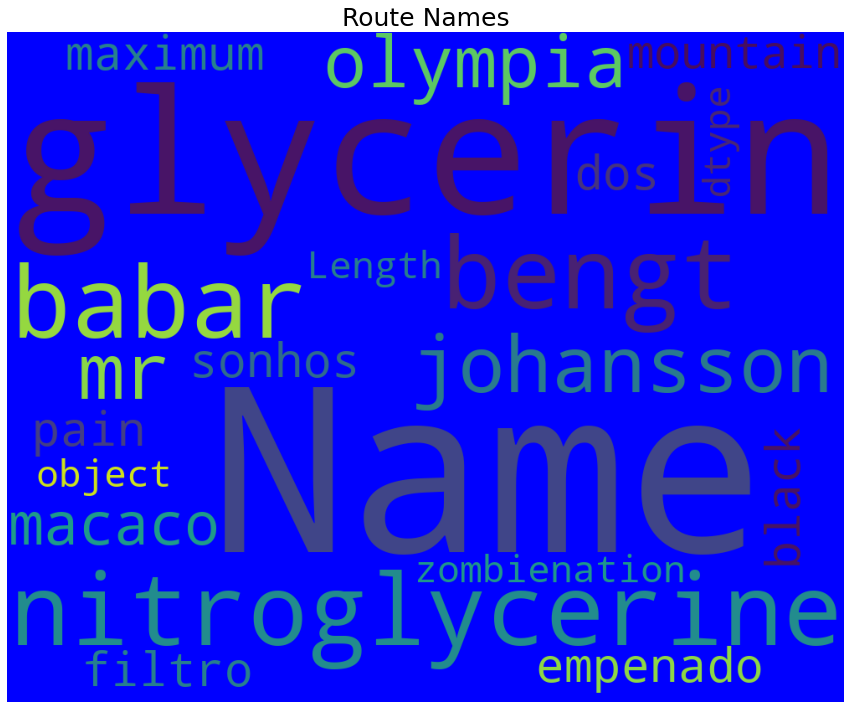

In [12]:
stopwords = STOPWORDS
wordcloud = WordCloud(background_color = 'blue', stopwords = stopwords, width = 1000, height = 800).generate(str(ascents_df['name']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Route Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
# plt.savefig('drugnames.png')
plt.show()

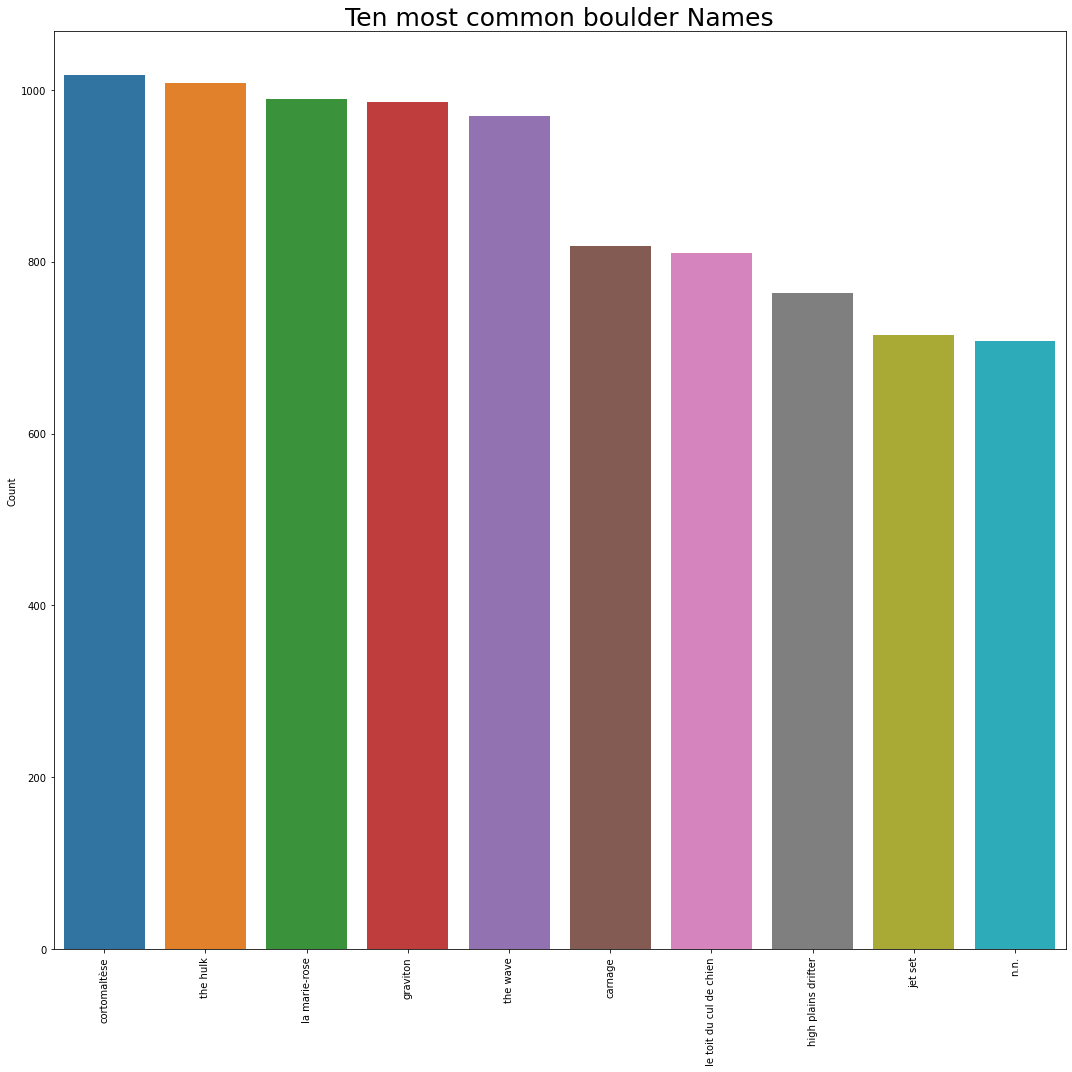

In [13]:
fontdict = {'fontsize':25}
ax = sns.countplot(x='name',data=ascents_df,order=pd.value_counts(ascents_df['name']).iloc[:10].index)
ax.set_title('Ten most common boulder Names', fontdict = fontdict)
ax.set_ylabel("Count")
ax.set_xlabel("")
# ax.set_xticklabels(rotation=90)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
# plt.savefig('Ten_most_common_bouldernames.png');

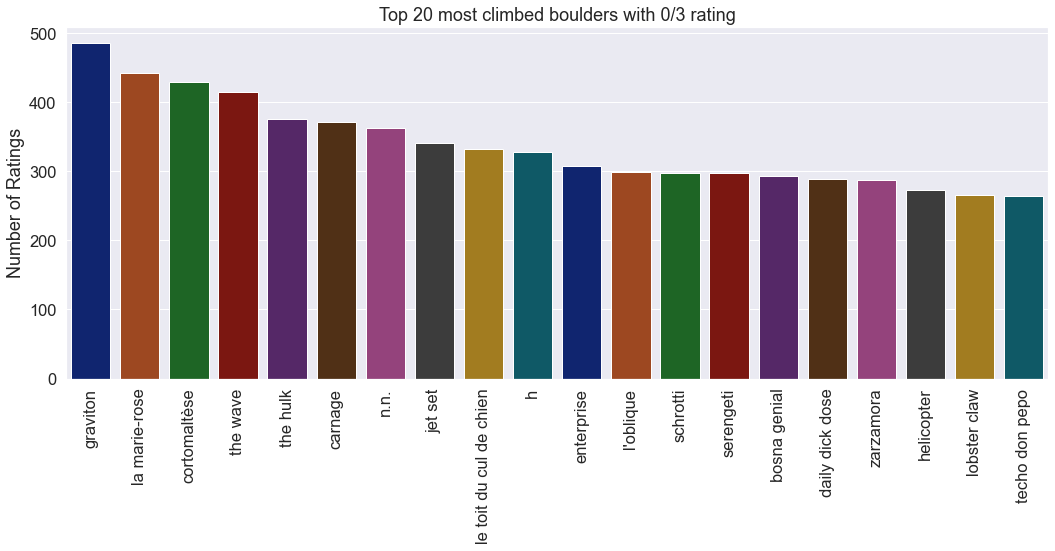

In [18]:
sns.set(font_scale = 1.5, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(ascents_df.loc[ascents_df.rating == 0, "name"].value_counts())
boulder_name = list(rating.keys())
boulder_rating = list(rating.values())

sns_rating = sns.barplot(x = boulder_name[0:20], y = boulder_rating[0:20], palette = 'dark')

sns_rating.set_title('Top 20 most climbed boulders with 0/3 rating')
sns_rating.set_ylabel("Number of Ratings")
# sns_rating.set_xlabel("Drug Names")
# plt.savefig('drugs_rated_1.png')
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.tight_layout()
# plt.savefig('drugs_rated_1.png');

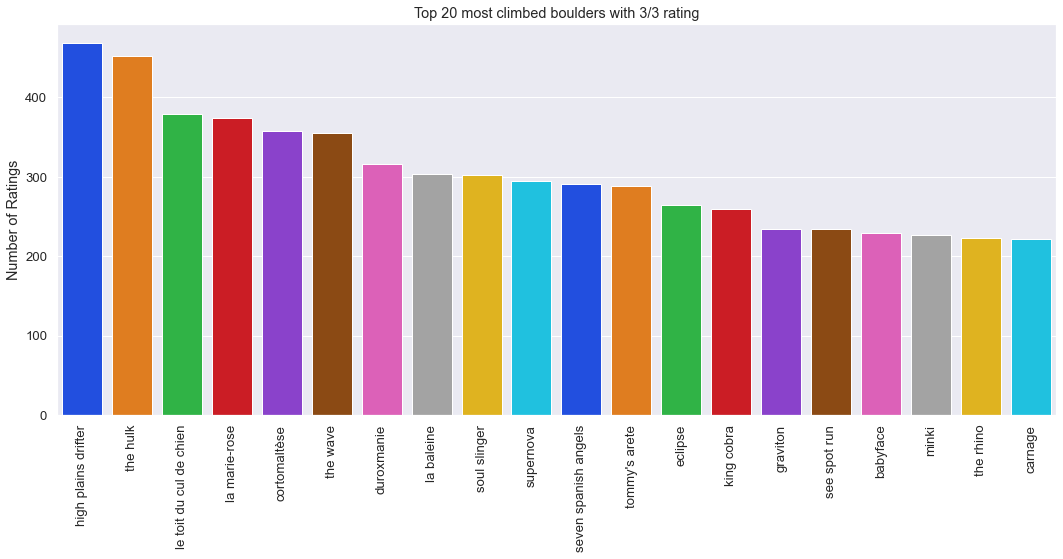

In [20]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(ascents_df.loc[ascents_df.rating == 3, "name"].value_counts())
boulder_name = list(rating.keys())
boulder_rating = list(rating.values())

sns_rating = sns.barplot(x = boulder_name[0:20], y = boulder_rating[0:20], palette = 'bright')

sns_rating.set_title('Top 20 most climbed boulders with 3/3 rating')
sns_rating.set_ylabel("Number of Ratings")
# sns_rating.set_xlabel("Boulder Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.tight_layout()
# plt.savefig('drugs_rated_10.png');

In [23]:
ascents_df.rating.value_counts()

0    515918
3    306210
2    251975
1    117178
Name: rating, dtype: int64

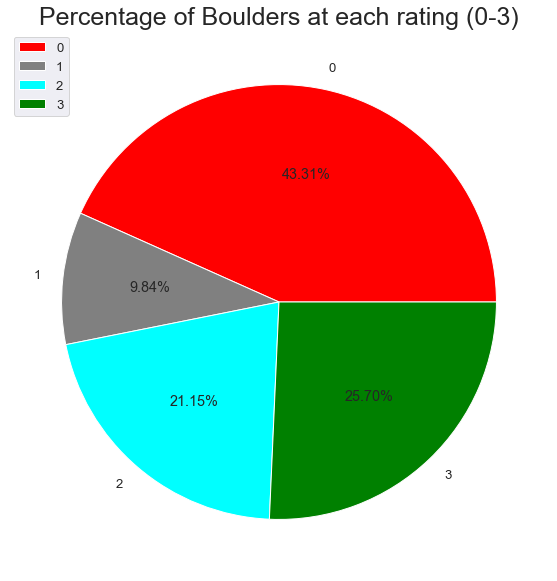

In [25]:
size = [515918, 117178, 251975, 306210]
colors = ['red','gray', 'cyan', 'green']
labels = '0','1', '2', '3'

# my_circle = plt.pie((0, 0), 0.7)

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Percentage of Boulders at each rating (0-3)', fontsize = 25)
p = plt.gcf()
# plt.gca().add_artist(my_circle)
plt.legend()
# plt.savefig('pie_chart_drug_rating_distribution.png')
plt.show()

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cp/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rating')

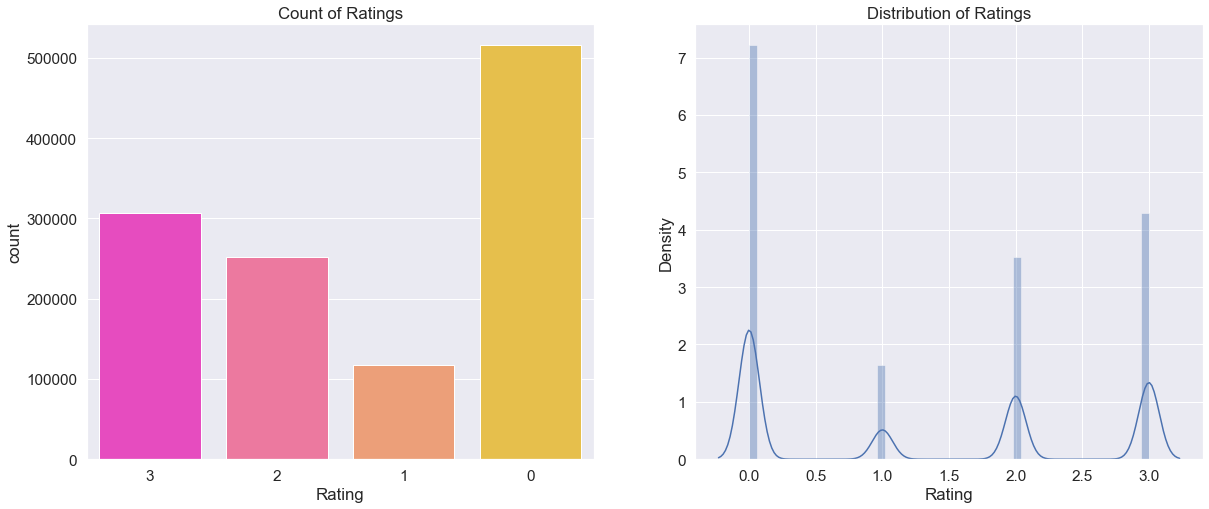

In [29]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(ascents_df['rating'], palette = 'spring', order = list(range(3, -1, -1)), ax = ax[0])
sns_2 = sns.distplot(ascents_df['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")
# plt.savefig('count_of_ratings_w_dist_ratings.png')

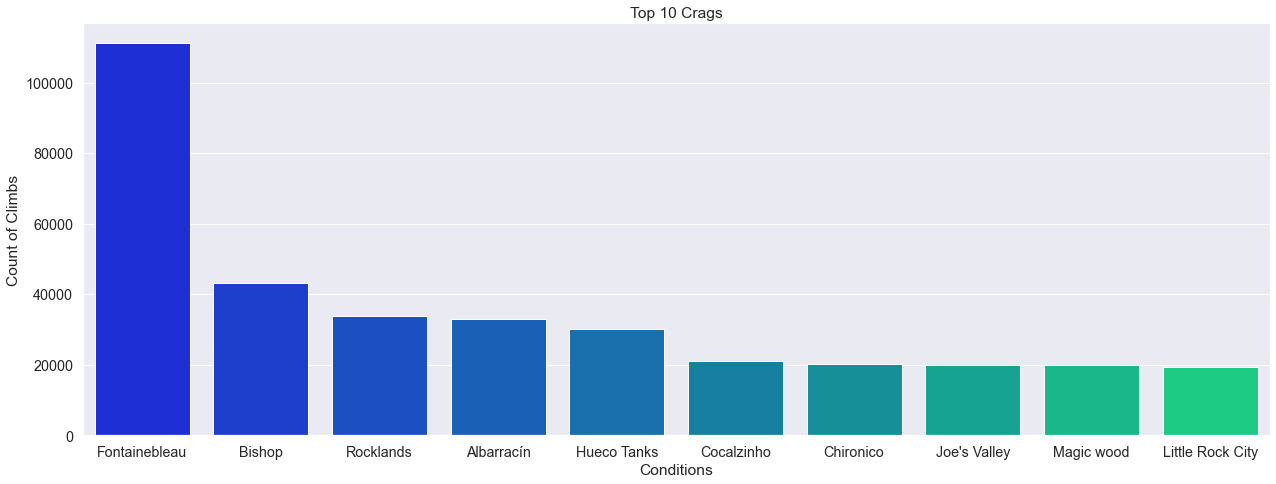

In [35]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(ascents_df['crag'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 Crags")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count of Climbs")
plt.tight_layout()
# plt.savefig('top10_conditions_for_drugs.png');

In [31]:
ascents_df.columns

Index(['id', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country', 'comment', 'rating', 'description', 'yellow_id', 'climb_try',
       'repeat', 'exclude_from_ranking', 'user_recommended', 'chipped'],
      dtype='object')

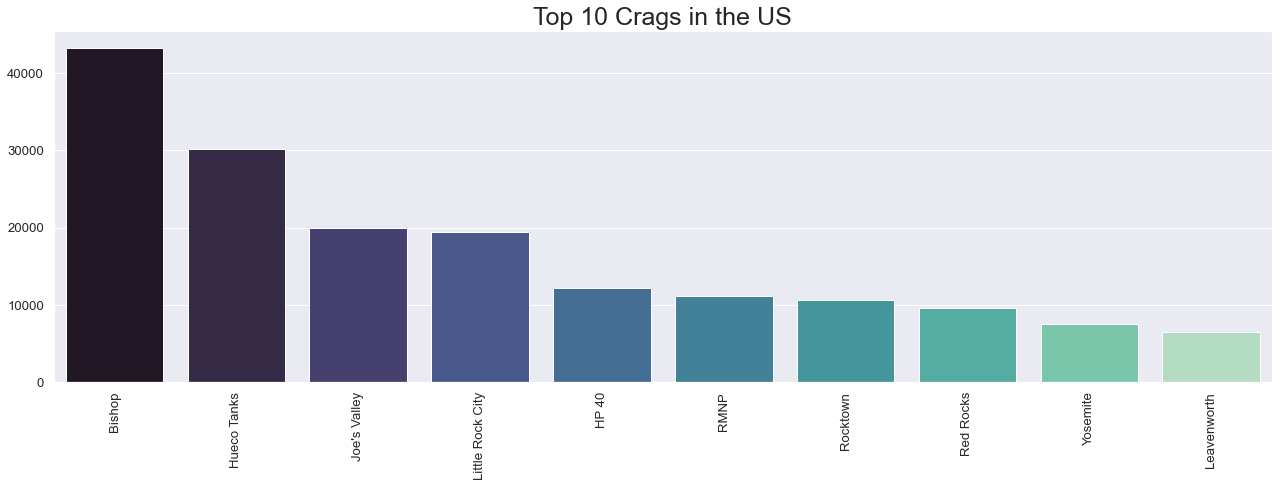

In [36]:
df1 = ascents_df[ascents_df['country'] == 'USA']['crag'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'mako')
# sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Crags in the US", fontsize = 25)
plt.setp(sns_.get_xticklabels(), rotation = 90)
plt.tight_layout()
# plt.savefig('top_drugs_for_birth_control.png');

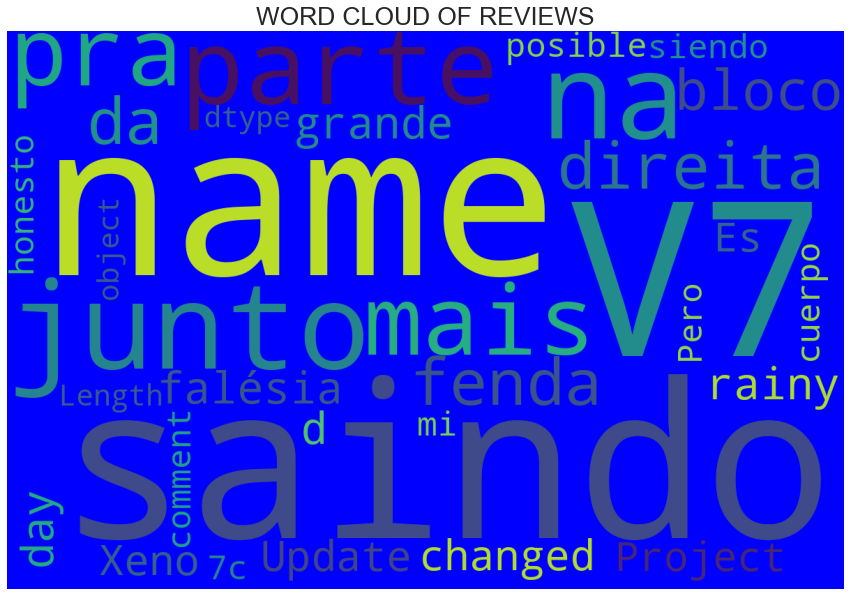

In [37]:
wordcloud = WordCloud(background_color = 'blue', stopwords = stopwords, width = 1200, height = 800).generate(str(ascents_df['comment']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
# plt.savefig('word_cloud_reviews_1.png')
plt.show()

In [39]:
ascents_df.loc[(ascents_df['rating'] >= 2), 'Review_Sentiment'] = 2
ascents_df.loc[(ascents_df['rating'] >= 1) & (ascents_df['rating'] < 2), 'Review_Sentiment'] = 1

ascents_df.loc[(ascents_df['rating'] < 1), 'Review_Sentiment'] = 0

ascents_df['Review_Sentiment'].value_counts()

2.0    558185
0.0    515918
1.0    117178
Name: Review_Sentiment, dtype: int64

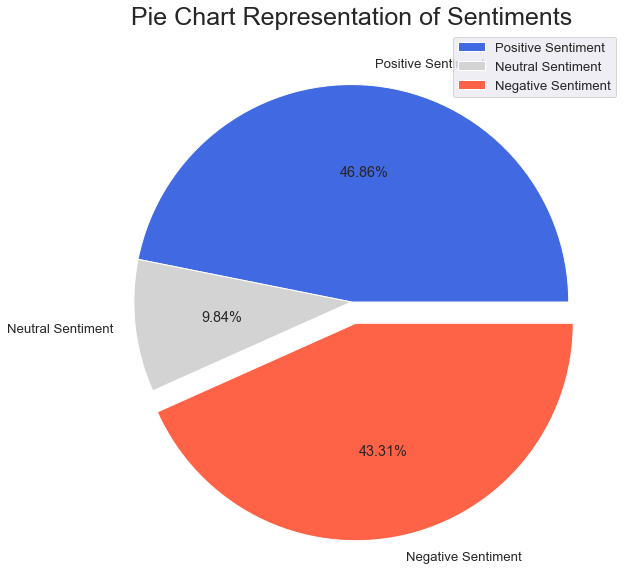

In [41]:
size = [558185, 117178, 515918]
colors = ['royalblue','lightgray' ,'tomato']
labels = "Positive Sentiment",'Neutral Sentiment', "Negative Sentiment"
explode = [0, 0,0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
# plt.savefig('pos_neutral_neg_sentiment.png')
plt.show()

In [49]:
# df2 = ascents_df[ascents_df.user_recommended == 'True']

In [50]:
# ascents_df.user_recommended.value_counts()

In [51]:
# ascents_df.info()

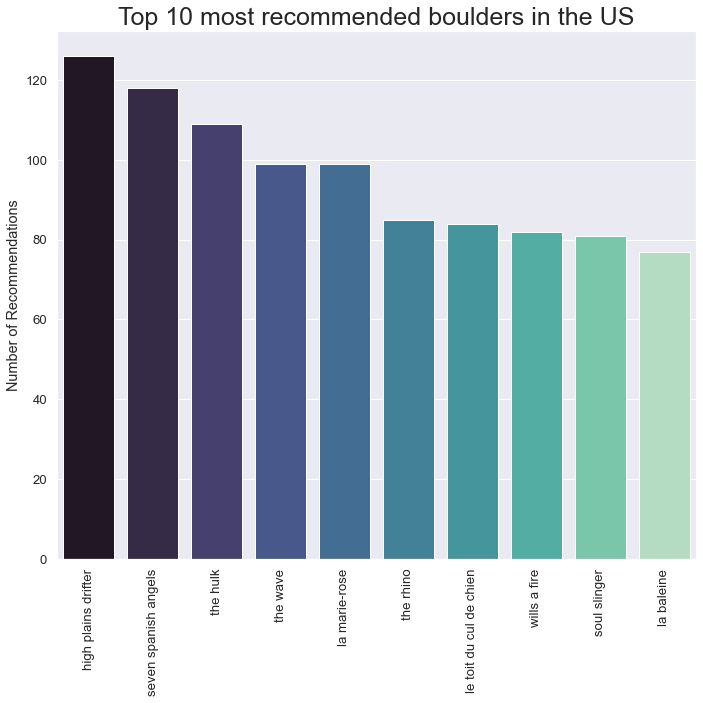

In [52]:
df1 = ascents_df[ascents_df['user_recommended'] == 1]['name'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'mako')
# sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 most recommended boulders in the US", fontsize = 25)
plt.setp(sns_.get_xticklabels(), rotation = 90)
sns_.set_ylabel("Number of Recommendations")
plt.tight_layout()

In [57]:
positive_sentiments = " ".join([text for text in ascents_df['comment'][ascents_df['Review_Sentiment'] == 2]])

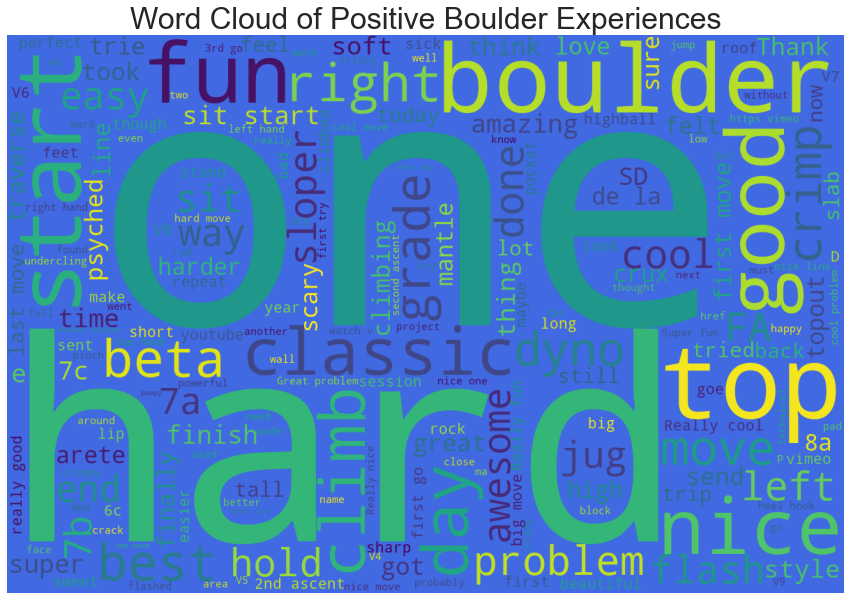

In [59]:
wordcloud = WordCloud(background_color = 'royalblue', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Boulder Experiences', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
# plt.savefig('word_cloud_postive.png')
plt.show()

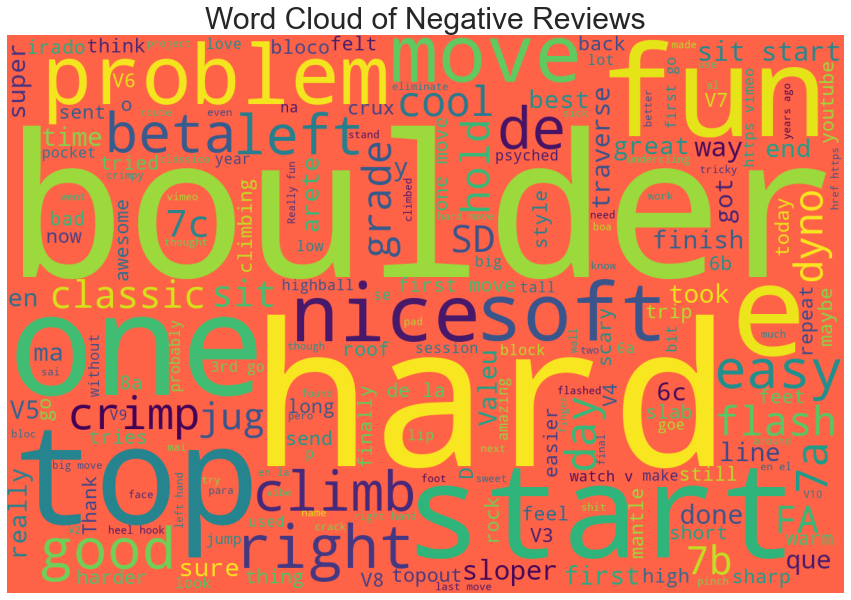

In [60]:
negative_sentiments = " ".join([text for text in ascents_df['comment'][ascents_df['Review_Sentiment'] == 0]])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'tomato', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
# plt.savefig('word_cloud_negative.png')
plt.show()

In [63]:
# converting the date into datetime format
ascents_df['date'] = pd.to_datetime(ascents_df['date'], errors = 'coerce')

# now extracting year from date
ascents_df['Year'] = ascents_df['date'].dt.year

# extracting the month from the date
ascents_df['month'] = ascents_df['date'].dt.month

# extracting the days from the date
ascents_df['day'] = ascents_df['date'].dt.day

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

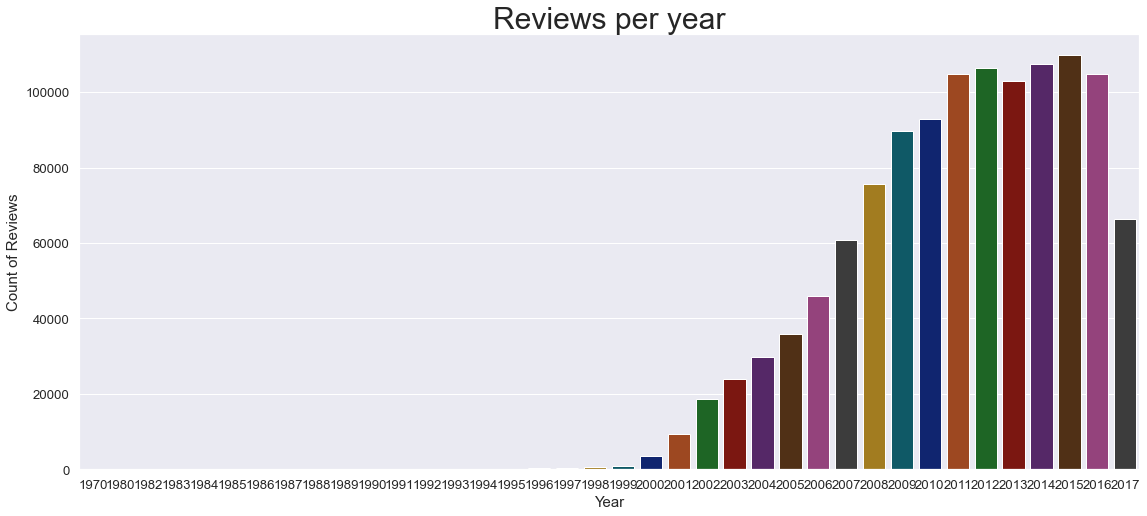

In [68]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(ascents_df['Year'], palette ='dark')
plt.title('Reviews per year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
x_labels = np.arange(1995, 2017)
plt.set_xticklabels(x_labels)
# plt.xlim([1995, 2000])
# plt.savefig('reviews_per_year.png')

plt.show()

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


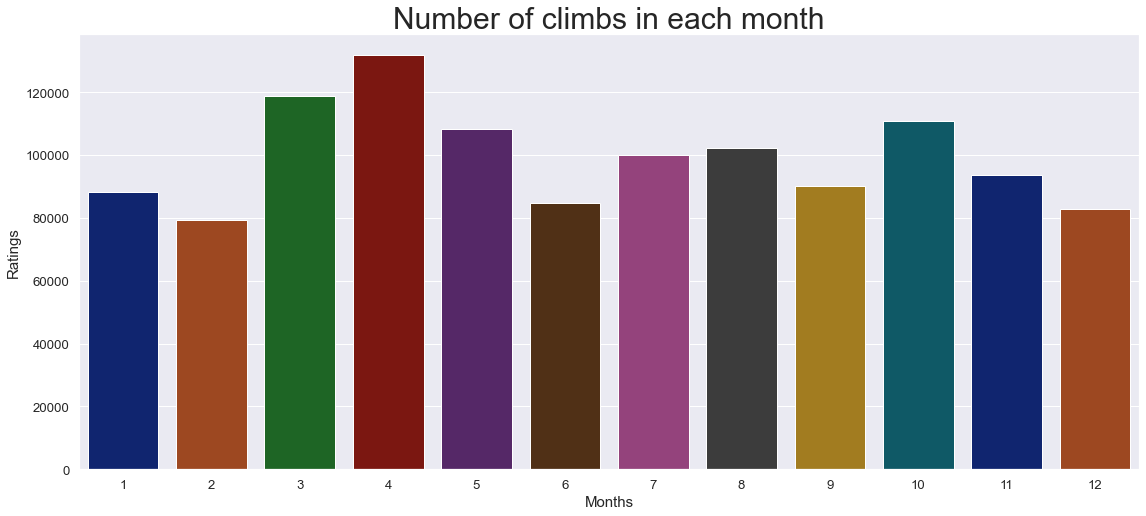

In [70]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(ascents_df['month'], palette ='dark')
plt.title('Number of climbs in each month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
# plt.savefig('reviews_by_month.png')
plt.show()